In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
#Reading and looking to data
df = pd.read_csv("BankChurners.csv", index_col = 0)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Text(0, 0.5, 'Count of Customers')

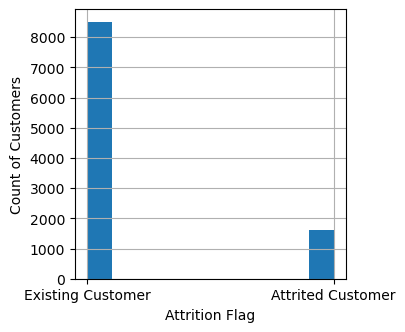

In [4]:
df["Attrition_Flag"].hist(figsize=(3.5,3.5))
plt.xlabel("Attrition Flag")
plt.ylabel("Count of Customers")

**Preprocessing of Data**

In [6]:
income_mapper={"Unknown":0,"Less than $40K":1,"$40K - $60K":2,"$60K - $80K":3,"$80K - $120K":4,"$120K +":5}
attrition_mapper={"Existing Customer":1,"Attrited Customer":0}
edu_mapper={'Unknown':0 , 'Uneducated' :1, 'High School':2 , 'College' :3,
'Graduate':4, 'Post-Graduate':5 , 'Doctorate' :6}
card_mapper={'Blue':0 , 'Silver' :1, 'Gold' :2, 'Platinum':3}
df=df.replace({"Income_Category":income_mapper,"Attrition_Flag":attrition_mapper,"Education_Level":edu_mapper,"Card_Category":card_mapper})
df.head(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,1,45,M,3,2,Married,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,1,49,F,5,4,Single,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,1,51,M,3,4,Married,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [7]:
nominmax=df.select_dtypes(["object"]).columns.to_list()
nominmax.append("Attrition_Flag")
minmaxlist=[x for x in df.columns if x not in nominmax]
dumlist=["Marital_Status","Gender"]
df2 = pd.concat([df,pd.get_dummies(df[dumlist],drop_first=False)],axis=1)
df2=df2.drop(["Marital_Status_Unknown","Gender_M","Gender","Marital_Status"],axis=1)

df2.head(3)

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Gender_F
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,
768805383,1,45,3,2,3,0,39,5,1,3,...,11914.0,1.335,1144,42,1.625,0.061,0,1,0,0
818770008,1,49,5,4,1,0,44,6,1,2,...,7392.0,1.541,1291,33,3.714,0.105,0,0,1,1
713982108,1,51,3,4,4,0,36,4,1,0,...,3418.0,2.594,1887,20,2.333,0.000,0,1,0,0


In [9]:
scaler = MinMaxScaler()
df_scaled=df2.copy()
df_scaled[minmaxlist]=scaler.fit_transform(df_scaled[minmaxlist])
df_scaled["Gender_F"].dtype

df_scaled.head(3)

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Gender_F
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,
768805383,1,0.404255,0.6,0.333333,0.6,0.0,0.604651,0.8,0.166667,0.500000,...,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061,0,1,0,0
818770008,1,0.489362,1.0,0.666667,0.2,0.0,0.720930,1.0,0.166667,0.333333,...,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105,0,0,1,1
713982108,1,0.531915,0.6,0.666667,0.8,0.0,0.534884,0.6,0.166667,0.000000,...,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000,0,1,0,0


**Alternatives for MinmaxScaler**

In [10]:
def minmax(dataa,cols):
    for i in cols:
        dataa[i]=dataa[i].map(lambda x: (x-dataa[i].min())/(dataa[i].max()-dataa[i].min()) )
    return dataa    

def minmaxscale(dataa,cols):
    for i in cols:
        dataa[i]=dataa[i].apply(lambda x:(x-dataa[i].min())/(dataa[i].max()-dataa[i].min()))
    return dataa    
#Note that these are working on dataframes and takes so much longer to scale data with these functions

In [11]:
k_array = np.arange(2,11)
inertia_list = []
silhouette_list=[]

for k in k_array:
    kmeans = KMeans(n_clusters= k, init="k-means++",random_state=10,max_iter=1000)
    kmeans.fit(df_scaled)
    inertia_list.append(kmeans.inertia_)
    s_score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_list.append(s_score)

In [12]:
total_list=list(zip(silhouette_list, inertia_list))
result=pd.DataFrame(total_list, columns=["silhouette","inertia"], index=k_array)
best_k_for_sil=result["silhouette"].idxmax()
best_k_for_sil
result

,silhouette,inertia
2,0.210587,14437.651166
3,0.201782,12441.635638
4,0.212267,11049.754280
5,0.229318,10181.490537
6,0.227919,9684.196227
7,0.218039,9234.727386
8,0.222040,8849.481792
9,0.214328,8503.910480
10,0.184088,8227.265931


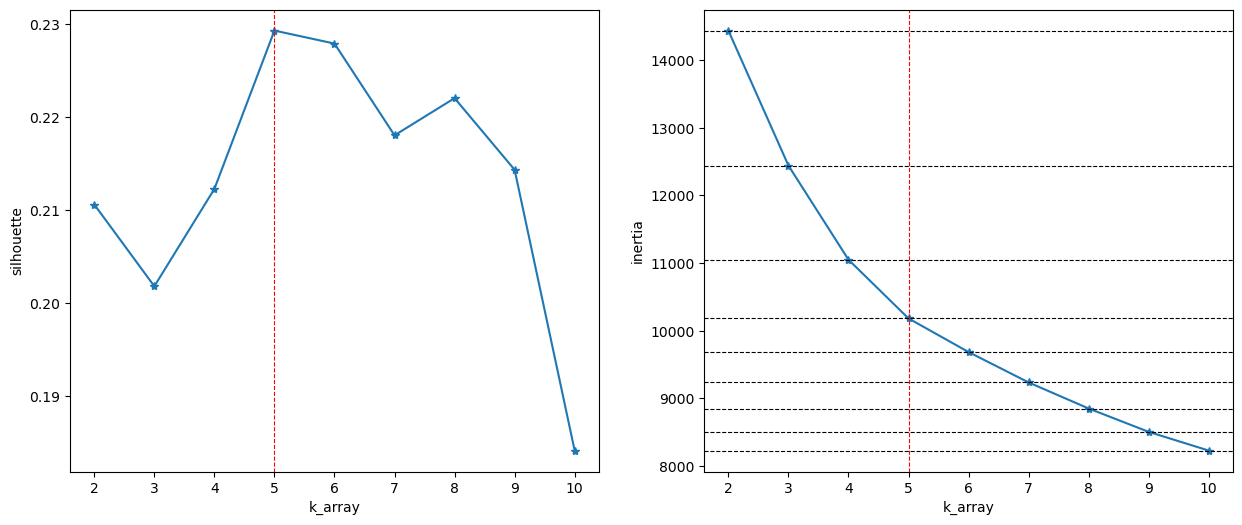

In [13]:
fig, ax = plt.subplots(1, 2,figsize=(15,6))
for i in range(2):
    ax[i].plot(result[result.columns[i]],marker="*",linewidth=1.5)
    ax[i].axvline(best_k_for_sil,color="red",linestyle="--",linewidth=0.8)
    ax[i].set_xlabel('k_array')
    ax[i].set_ylabel(result.columns[i])
for kl in inertia_list:
    ax[1].axhline(kl, color="black",linestyle="--",linewidth=0.8)


In [14]:
cluster_model = KMeans(n_clusters=best_k_for_sil, n_init=5, init="k-means++", max_iter=1000,random_state=10)

cluster_model.fit(df_scaled)

KMeans(max_iter=1000, n_clusters=5, n_init=5, random_state=10)

In [15]:
df_centers = pd.DataFrame(cluster_model.cluster_centers_, columns = df_scaled.columns, index=np.unique(cluster_model.labels_))
df_centers.index.name="Clusters"
df_centers

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Gender_F
Clusters,,,,,,,,,,,,,,,,,,,,,
0,0.842975,0.430994,0.456302,0.431474,0.663946,0.048209,0.535580,0.554236,0.388344,0.411587,...,0.379861,0.221490,0.237519,0.440571,0.191072,0.176529,-1.387779e-16,-2.553513e-15,9.390496e-01,1.776357e-15
1,0.820706,0.428155,0.457224,0.424235,0.198024,0.024941,0.528350,0.553318,0.394353,0.409255,...,0.119013,0.219163,0.220267,0.453658,0.191130,0.332651,-1.387779e-16,-2.886580e-15,1.000000e+00,1.000000e+00
2,0.867174,0.435200,0.478265,0.432245,0.672361,0.031157,0.534166,0.569052,0.388342,0.422257,...,0.306550,0.230050,0.207769,0.384473,0.192508,0.219335,-1.387779e-16,1.000000e+00,-1.110223e-16,1.776357e-15
3,0.831905,0.446618,0.468707,0.443152,0.198776,0.013600,0.545055,0.567442,0.389433,0.397933,...,0.101350,0.224889,0.200213,0.416024,0.192892,0.354351,-1.526557e-16,1.000000e+00,-8.326673e-16,1.000000e+00
4,0.831037,0.411600,0.492241,0.436669,0.382596,0.023930,0.514832,0.568963,0.390742,0.404762,...,0.194771,0.221454,0.225401,0.442563,0.190522,0.274868,5.424220e-01,-1.054712e-15,-1.221245e-15,5.670776e-01


In [16]:
cluster_model.labels_
cluster_labels=np.unique(cluster_model.labels_,return_counts=True)[0]
cluster_labels_with_counts=list(zip(cluster_labels,np.unique(cluster_model.labels_,return_counts=True)[1]))
cluster_labels_with_counts
for i,j in cluster_labels_with_counts:
    print(f"Cluster {i} Count: {j}\n")
print("As you can see distribution of labels is even")

Cluster 0 Count: 1941

Cluster 1 Count: 2125

Cluster 2 Count: 2236

Cluster 3 Count: 2451

Cluster 4 Count: 1374

As you can see distribution of labels is even


In [17]:
highest_att_flag=df_centers.loc[df_centers["Attrition_Flag"].idxmax()]
lowest_att_flag=df_centers.loc[df_centers["Attrition_Flag"].idxmin()]
df_maxmin=pd.merge(highest_att_flag, lowest_att_flag, left_index=True, right_index=True).T
df_maxmin

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Gender_F
2,0.867174,0.435200,0.478265,0.432245,0.672361,0.031157,0.534166,0.569052,0.388342,0.422257,...,0.306550,0.230050,0.207769,0.384473,0.192508,0.219335,-1.387779e-16,1.000000e+00,-1.110223e-16,1.776357e-15
1,0.820706,0.428155,0.457224,0.424235,0.198024,0.024941,0.528350,0.553318,0.394353,0.409255,...,0.119013,0.219163,0.220267,0.453658,0.191130,0.332651,-1.387779e-16,-2.886580e-15,1.000000e+00,1.000000e+00


# Analysis Part

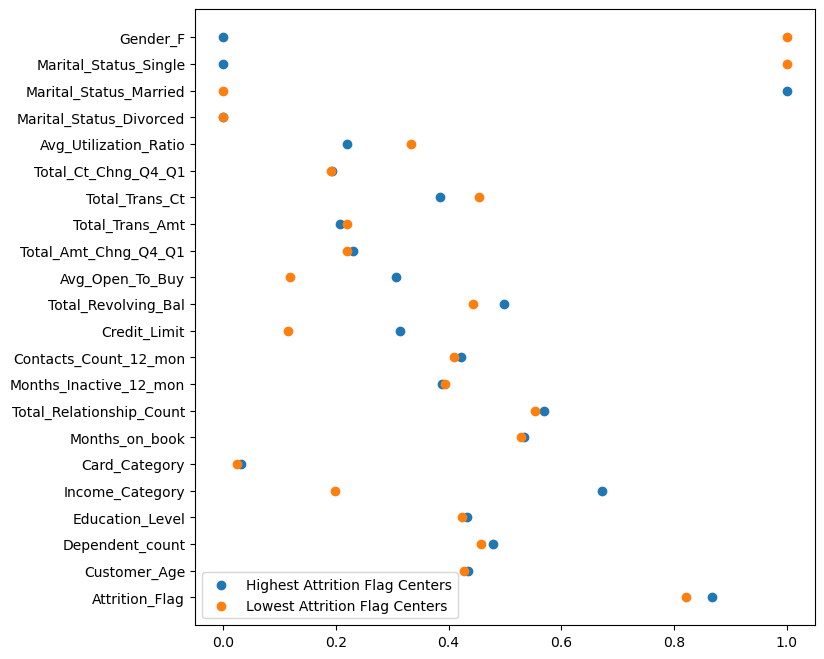

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(x=df_maxmin[0:1].values,y=df_maxmin[0:1].columns)
plt.scatter(x=df_maxmin[1:2].values,y=df_maxmin[1:2].columns)
plt.legend(["Highest Attrition Flag Centers","Lowest Attrition Flag Centers"],loc=0)

**Attrition Flag Analysis:**

- **Customer_Age** $\Rightarrow$ : Not very descriptive about Attrition

- **Gender** $\Rightarrow$ : Male Attrition is Highest

- **Dependent_count** $\Rightarrow$ : Not very descriptive about Attrition

- **Education_Level** $\Rightarrow$ : Not very descriptive about Attrition

- **Marital_Status** $\Rightarrow$ : Married People tend to Attrition!, Singles least Attried Customers

- **Income_Category** $\Rightarrow$ : Higher Income means higher attrition!

- **Card_Category** $\Rightarrow$ : Not very descriptive about Attrition

- **Months_on_book Period** $\Rightarrow$ :  Not very descriptive about Attrition

- **Total_Relationship_Count** $\Rightarrow$ :  Not very descriptive about Attrition(we might expect this to be descriptive but original data is problem)

- **Months_Inactive_12_mon** $\Rightarrow$ : Not very descriptive about Attrition(we might expect this to be descriptive but original data is problem)

- **Contacts_Count_12_mon** $\Rightarrow$ : Not very descriptive about Attrition

- **Credit_Limit** $\Rightarrow$ : Not so much descriptive but as it seems from difference highest-lowest clusters we can say higher limit means higher attrition

- **Total_Revolving_Bal** $\Rightarrow$ : Not very descriptive about Attrition
- **Avg_Open_To_Buy** $\Rightarrow$ : Higher this score, higher to risk of attrition

- **Total_Amt_Chng_Q4_Q1** $\Rightarrow$ : Not very descriptive about Attrition

- **Total_Trans_Amt** $\Rightarrow$ : Not very descriptive about Attrition

- **Total_Trans_Ct** $\Rightarrow$ : As it seems from difference of two clusters, highest count means lower attrition

- **Total_Ct_Chng_Q4_Q1** $\Rightarrow$ : Not very descriptive about Attrition

- **Avg_Utilization_Ratio** $\Rightarrow$ : Higher this ratio, lower the attrition


In [19]:
df_scaled.columns.size
df_plot=df_scaled.copy()
df_plot=df_plot.drop("Attrition_Flag",axis=1)
df_plot.head(3)

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Gender_F
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,
768805383,0.404255,0.6,0.333333,0.6,0.0,0.604651,0.8,0.166667,0.500000,0.340190,...,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061,0,1,0,0
818770008,0.489362,1.0,0.666667,0.2,0.0,0.720930,1.0,0.166667,0.333333,0.206112,...,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105,0,0,1,1
713982108,0.531915,0.6,0.666667,0.8,0.0,0.534884,0.6,0.166667,0.000000,0.059850,...,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000,0,1,0,0


**Checking distributions of Attrition Flag with all of the columns**

C:\Users\ahmet\anaconda3\envs\new_env\lib\site-packages\seaborn\axisgrid.py:1690: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


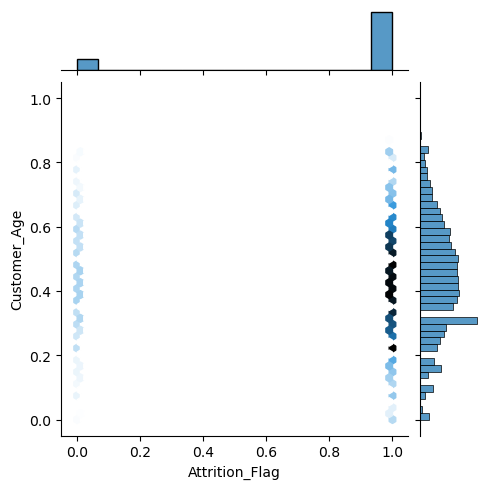

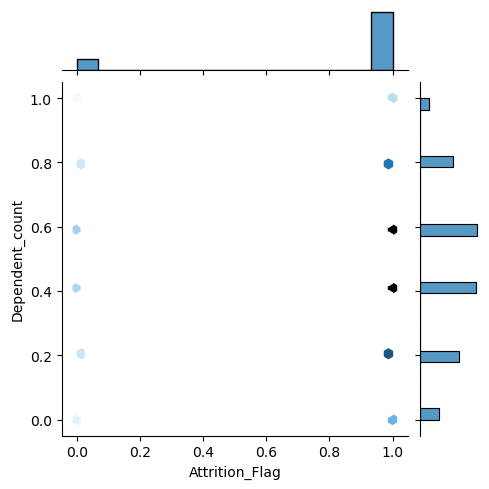

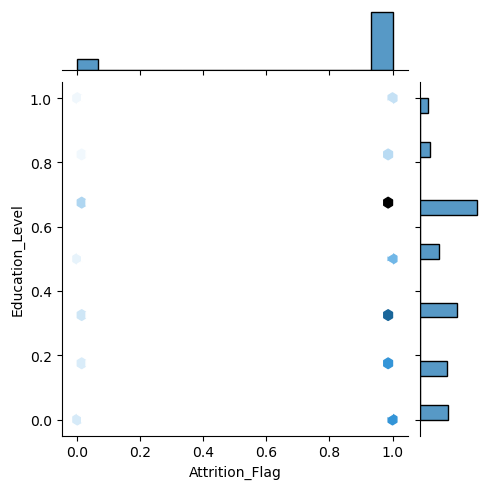

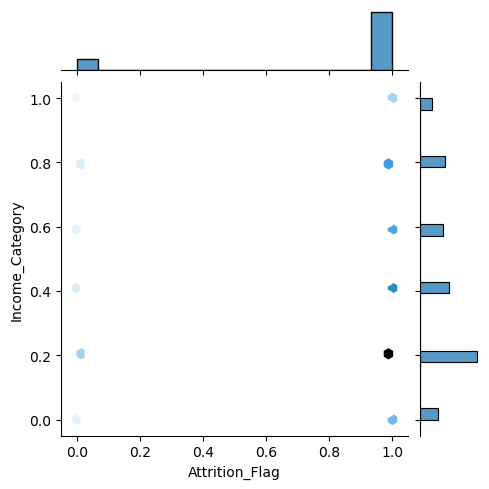

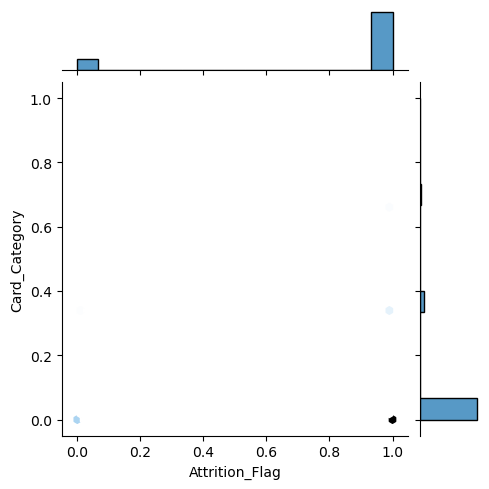

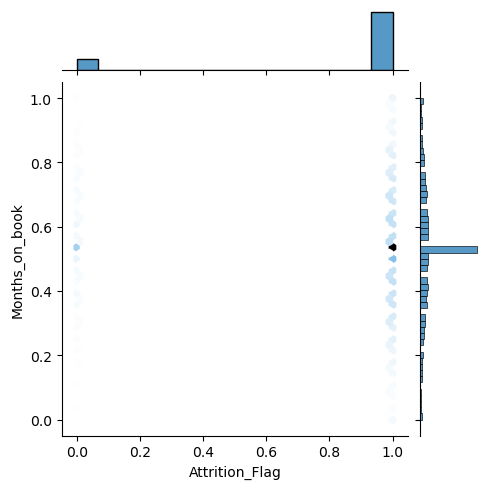

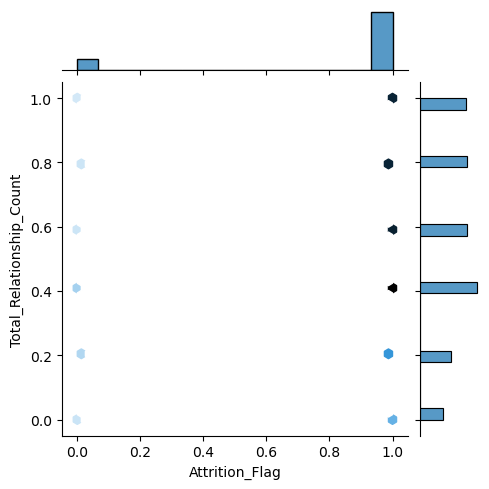

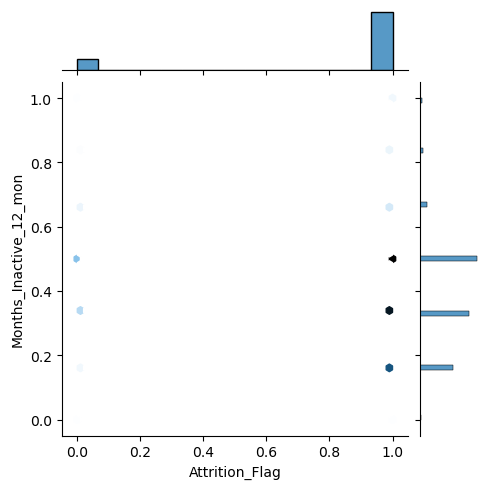

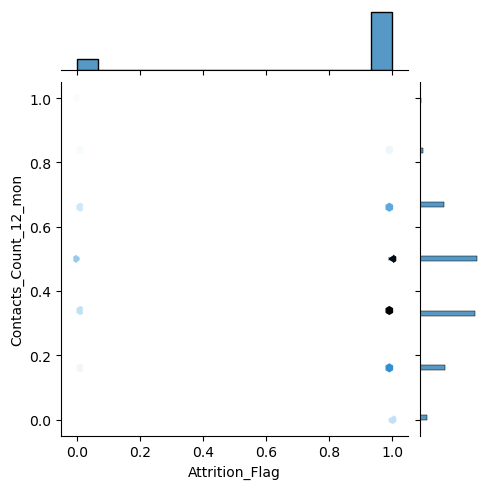

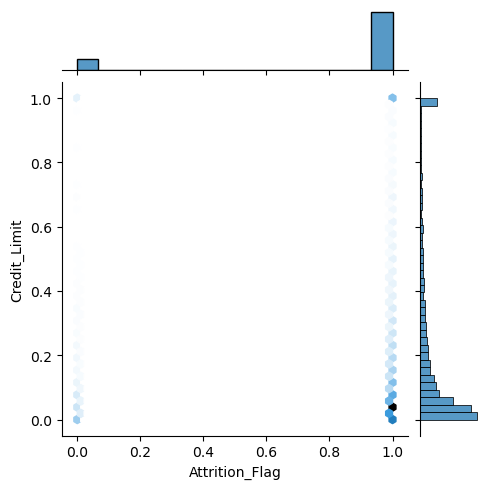

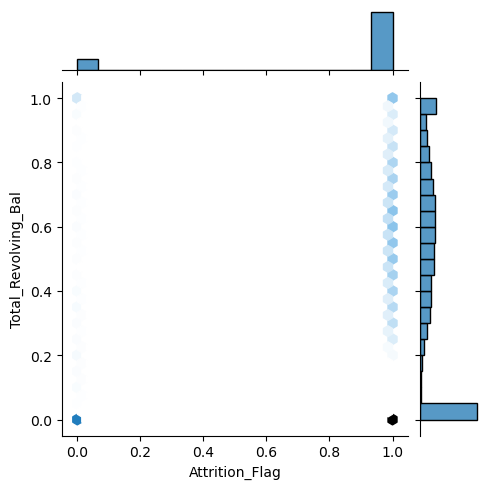

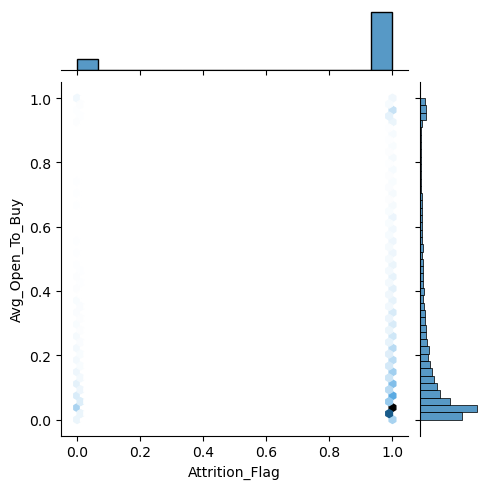

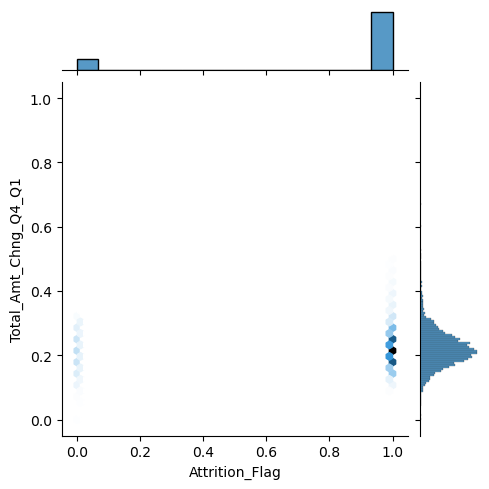

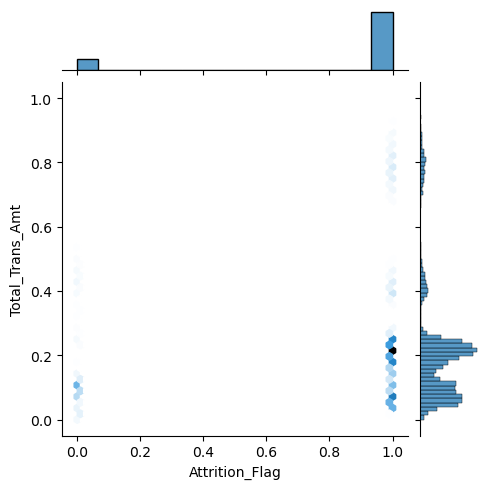

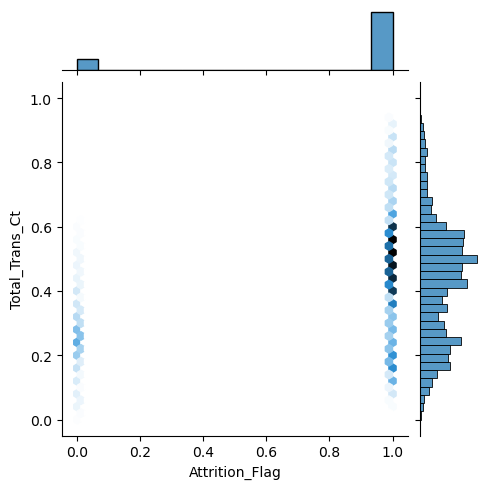

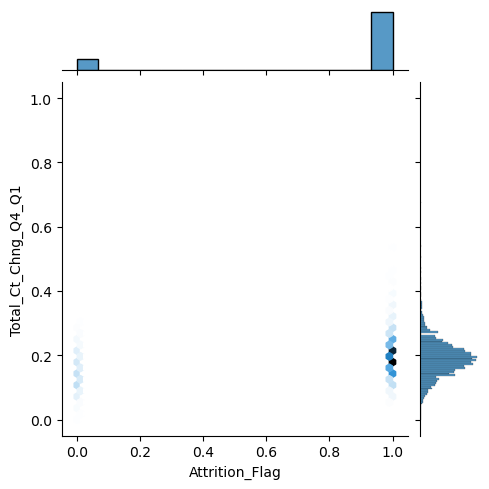

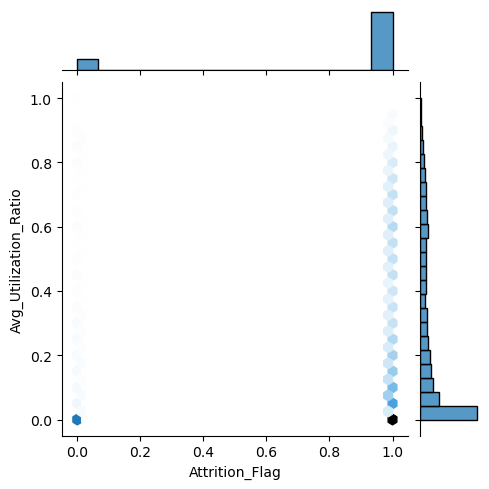

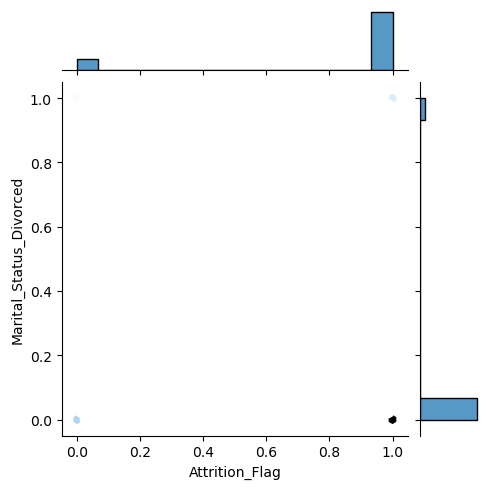

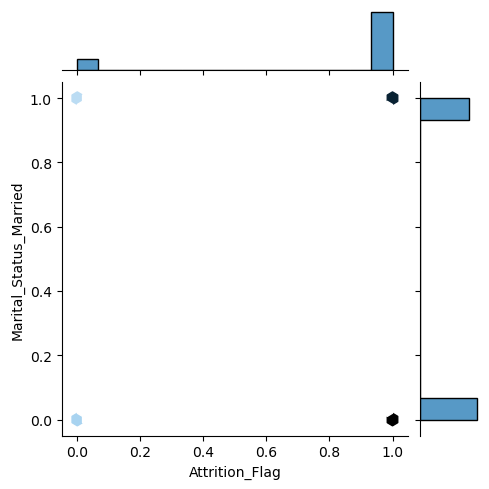

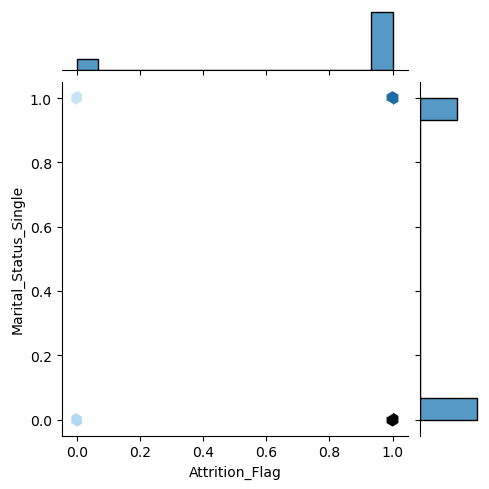

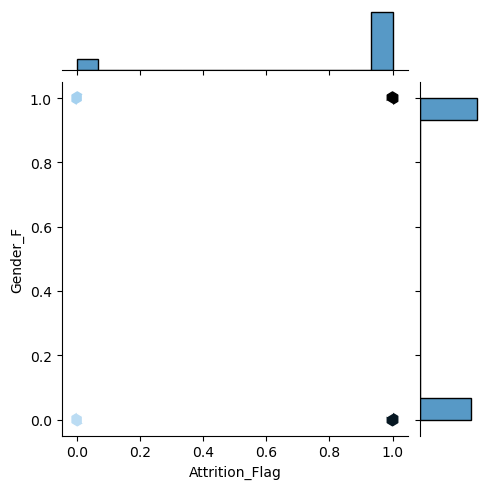

In [20]:
for i in range(21):
    sns.jointplot(x="Attrition_Flag",y=df_plot.columns[i],data=df_scaled,kind='hex',height=5)